### Check the GPU
Let's make sure that we have access to GPU

In [1]:
!nvidia-smi

Wed Jun 12 09:40:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### install the ultrallytics for YOLO8 algorithm

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [4]:
from ultralytics import YOLO    #import the yolo algorithm from ultralytics

from IPython.display import display, Image    #import the Ipython function to display the images

In [8]:
!mkdir {HOME}/datasets     #create the datasets directory to save the images, labels and weights to train the algorithm
%cd {HOME}/datasets

!pip install roboflow --quiet   


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 786.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76


In [9]:
from roboflow import Roboflow     #import the roboflow 
#create the dataset using the roboflow and import the dataset with API KEYs(uncomment the below code)
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("mldl-i6z0f").project("crop-or-weed")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crop-or-weed-1 in yolov8:: 100%|██████████| 4432/4432 [00:01<00:00, 3556.86it/s]


###
```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=(data location){/content/datasets/Crop-or-weed-1/}data.yaml epochs=10 imgsz=512 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 178MB/s]
New https://pypi.org/project/ultralytics/8.2.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Crop-or-weed-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_b

In [11]:
!ls {HOME}/runs/detect/train/    #yolo model create the runs directory default to save the predictions

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1718185393.c10a8855273e.1076.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


### Evalution the model accuracy and loss 

/content


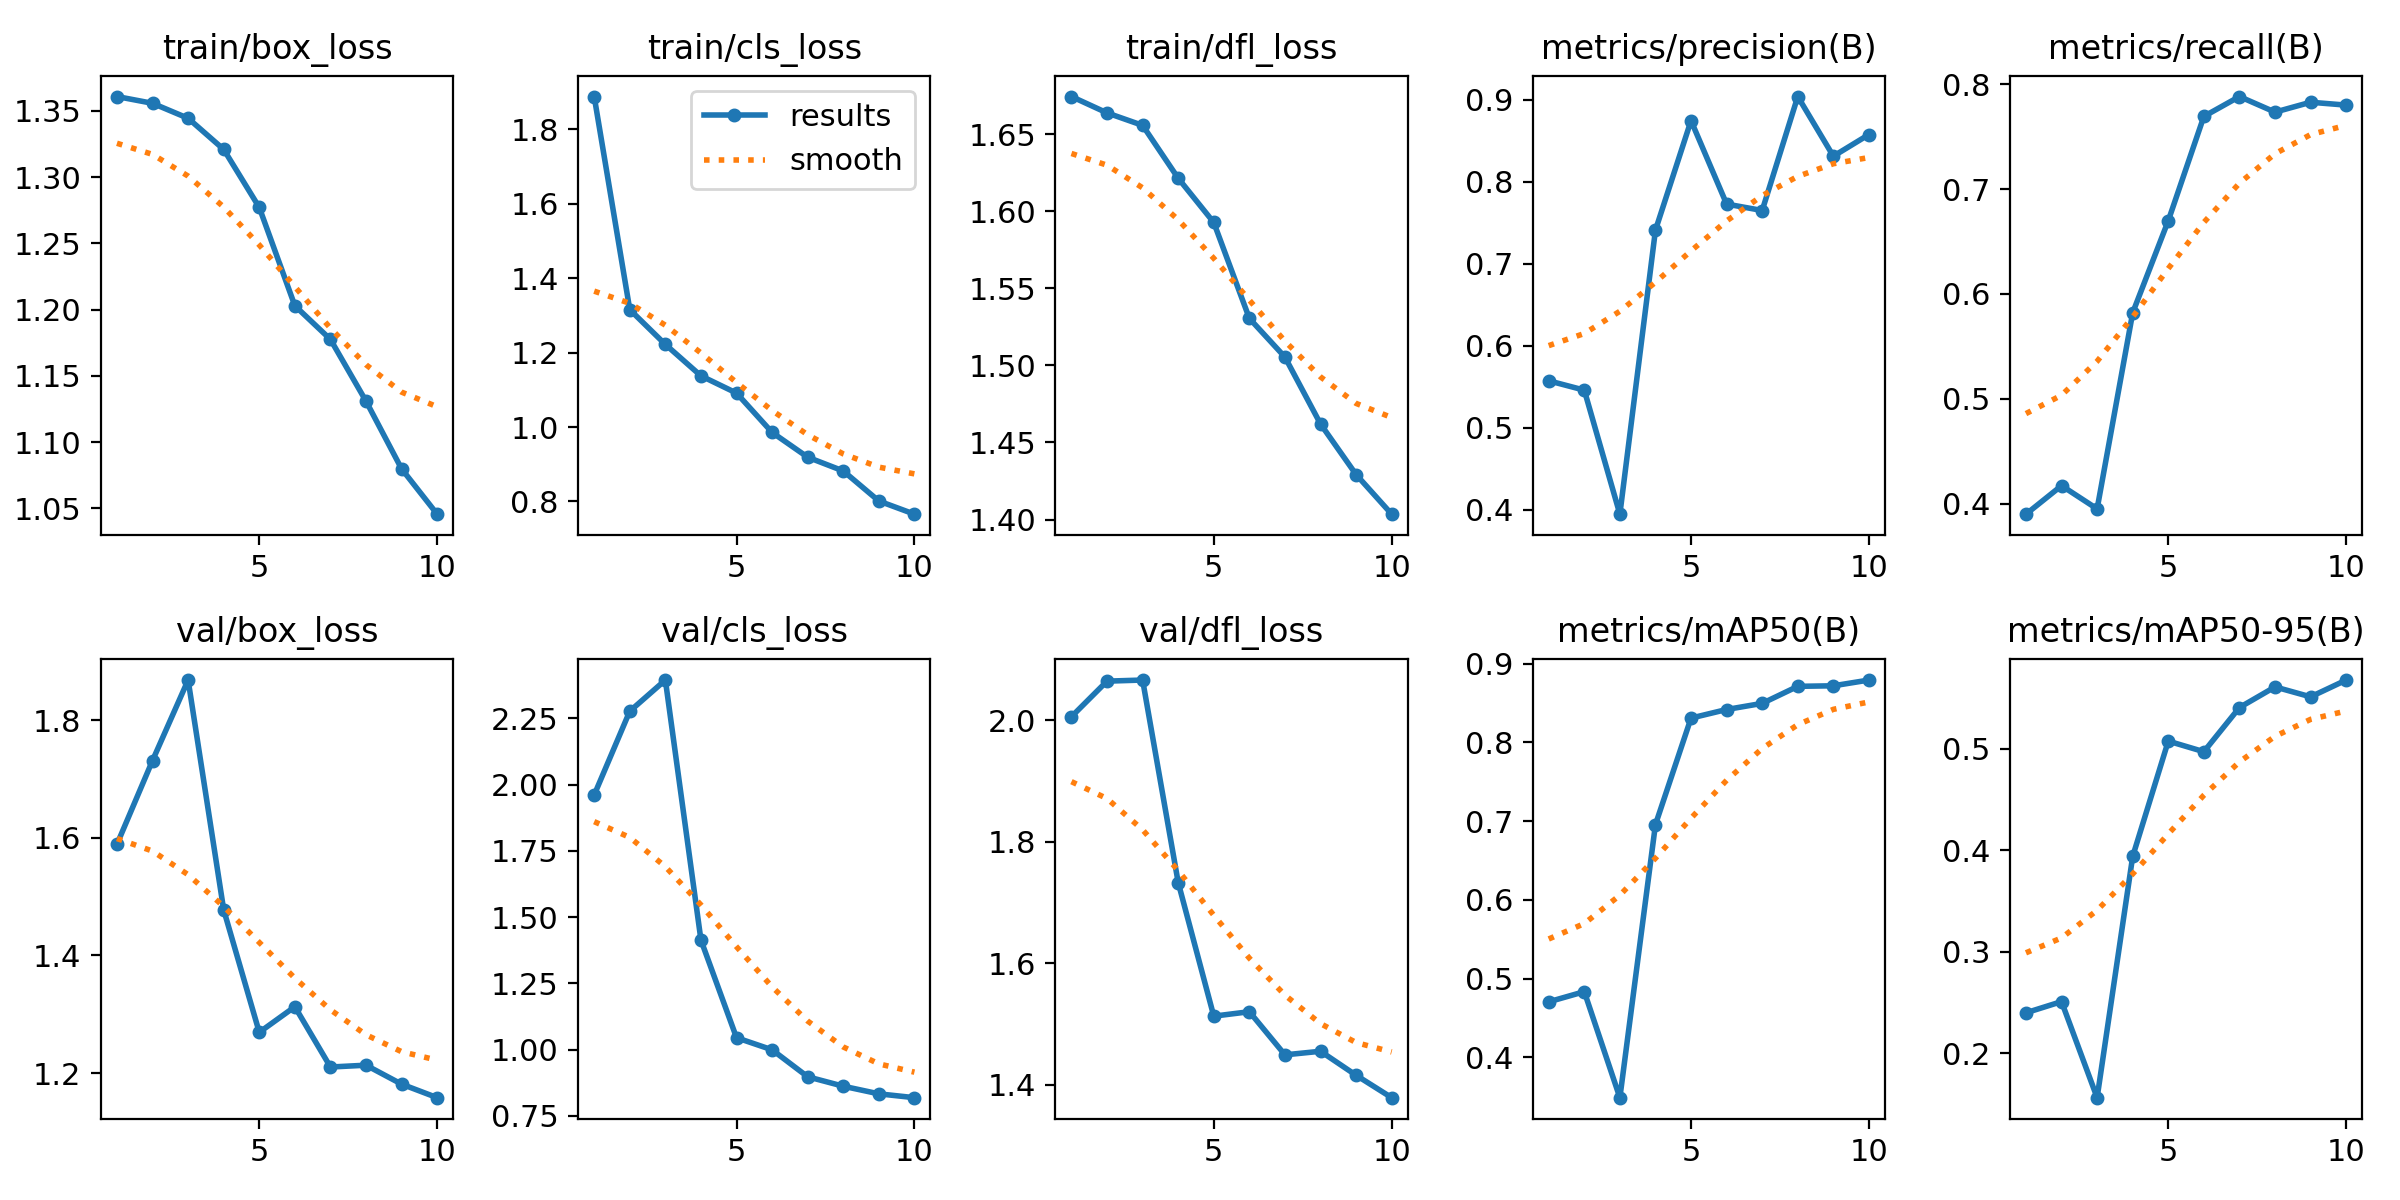

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## train the model with best weights

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/Crop-or-weed-1/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Crop-or-weed-1/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100% 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94% 16/17 [00:06<00:00,  5.73it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.46it/s]
                   all        260        417      0.857       0.78      0.879

### Model testing

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Crop-or-weed-1/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/130 /content/datasets/Crop-or-weed-1/test/images/agri_0_1020_jpeg.rf.4f400b7c24d0e2def48c9edff429911d.jpg: 512x512 1 weed, 11.1ms
image 2/130 /content/datasets/Crop-or-weed-1/test/images/agri_0_1166_jpeg.rf.db608cfcea69c24f8fdc2aeeea529331.jpg: 512x512 1 weed, 11.2ms
image 3/130 /content/datasets/Crop-or-weed-1/test/images/agri_0_1168_jpeg.rf.7d2fd5a7fa7403a8a3ab574aff855e55.jpg: 512x512 1 weed, 11.0ms
image 4/130 /content/datasets/Crop-or-weed-1/test/images/agri_0_1171_jpeg.rf.98d81368a01f77d847d4ca2885bcfdb3.jpg: 512x512 1 crop, 11.0ms
image 5/130 /content/datasets/Crop-or-weed-1/test/images/agri_0_1210_jpeg.rf.12a7434c2de1c446d192e24720b43e63.jpg: 512x512 1 weed, 11.0ms
image 6/130 /content/datasets/Crop-or-weed-1/test/images/agri_0_1385_jpeg.rf.431225c5f35028a16a9ad67f6267c652.jpg: 512x512 1 weed, 

### prediction the image and localize the object with bounding box and class name

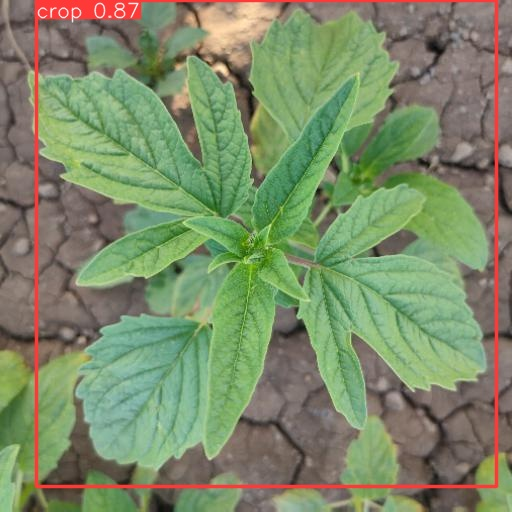

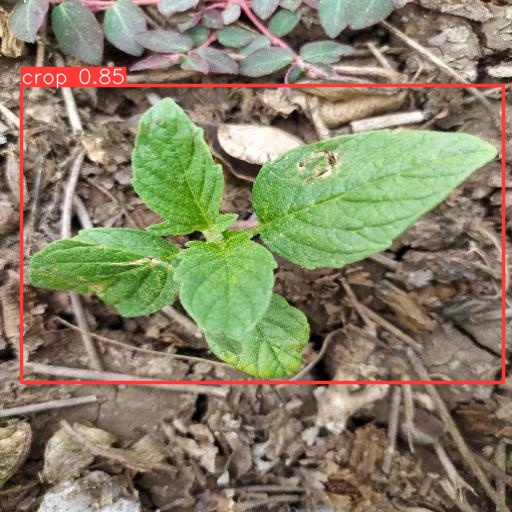

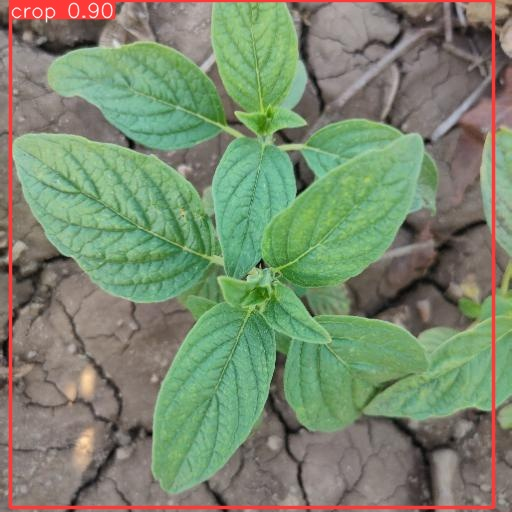

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=512))
      print("\n")